# <font color='green' style='font-size: 30px backgound =;'>Regressão Linear</font>
<hr style='border: 2px solid green;'>

##### 1- Ánalise preliminares

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn import metrics

Bibliotecas opcionais

import warnings

> warnings.filterwarnings('ignores') # Não aparece as msg informativas

#ou

>warnings.filterwarnings(action='once')# Aparece apenas uma vez e some

<div>
<h2>palette -> </h2>
<p>
    Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
</p>
   </br>
<h2>style -> </h2>
<p>white, dark, whitegrid, darkgrid, ticks</p>

</div>

In [3]:
dados = pd.read_csv('Consumo_cerveja.csv',sep=';')
dados.head(5)

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


In [4]:
dados.shape

(365, 7)

In [5]:
#Tabela descritova dos dados
dados.describe().round()

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.0,365.0,365.0,365.0,365.0,365.0
mean,21.0,17.0,27.0,5.0,0.0,25401.0
std,3.0,3.0,4.0,12.0,0.0,4399.0
min,13.0,11.0,14.0,0.0,0.0,14343.0
25%,19.0,15.0,24.0,0.0,0.0,22008.0
50%,21.0,18.0,27.0,0.0,0.0,24867.0
75%,23.0,20.0,29.0,3.0,1.0,28631.0
max,29.0,24.0,36.0,95.0,1.0,37937.0


In [6]:
#Matriz analíse de correlação
dados.corr().round(4)

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
chuva,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


##### 2- Comportamento da variável dependente (Y)

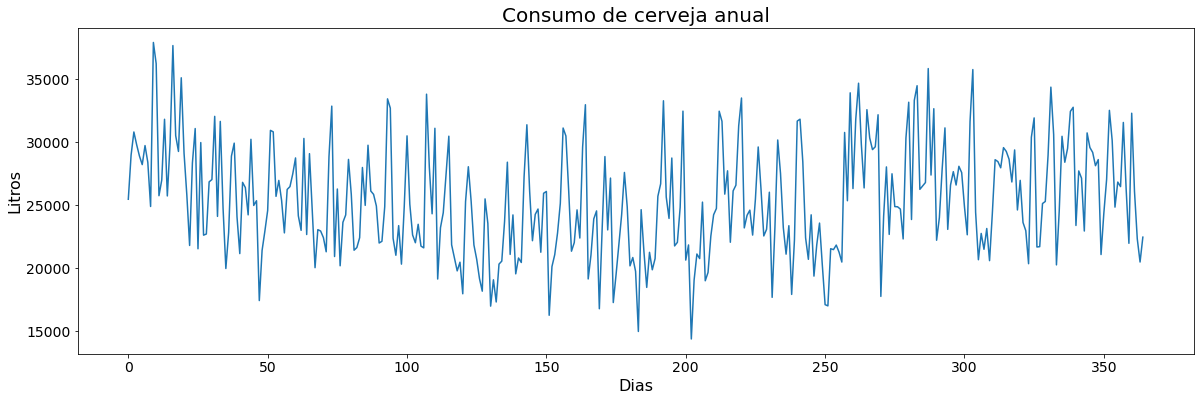

In [7]:
#Visualização serie histórica do Consumo da cerveja durante o ano
fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Consumo de cerveja anual', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Dias', fontsize=16)
ax = dados['consumo'].plot(fontsize=14)

In [8]:
import seaborn as sns

<AxesSubplot:>

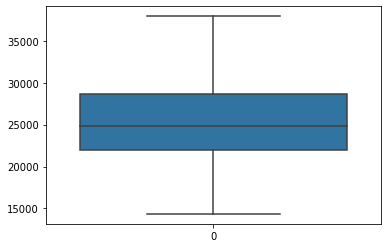

In [9]:
sns.boxplot(data=dados['consumo'])

<AxesSubplot:>

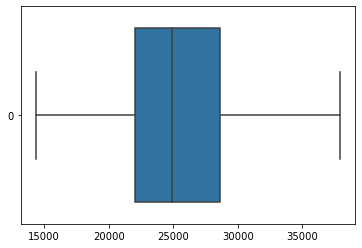

In [10]:
#Na horizontal
sns.boxplot(data=dados['consumo'], orient='h')

Text(0, 0.5, 'Litros')

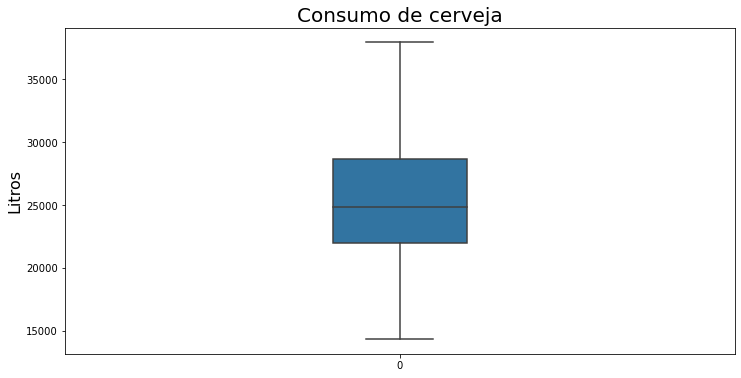

In [11]:
ax = sns.boxplot(data=dados['consumo'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)

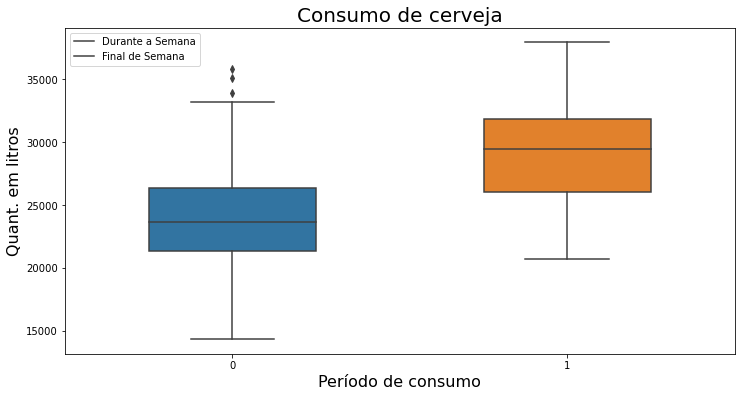

In [12]:
ax = sns.boxplot(y='consumo',x='fds',data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Quant. em litros', fontsize=16)
ax.set_xlabel('Período de consumo', fontsize=16)

pd.DataFrame({"Durante a Semana": [7,1,5,6,3,10,5,8],
                    "Final de Seman" : [1,2,8,4,3,9,5,2]})
plt.legend(labels = ['Durante a Semana','Final de Semana'])

Paleta de cores 

In [13]:
#palette -> Accent, Accent_r
sns.set_palette('Accent') 

#style ->
sns.set_style("darkgrid")

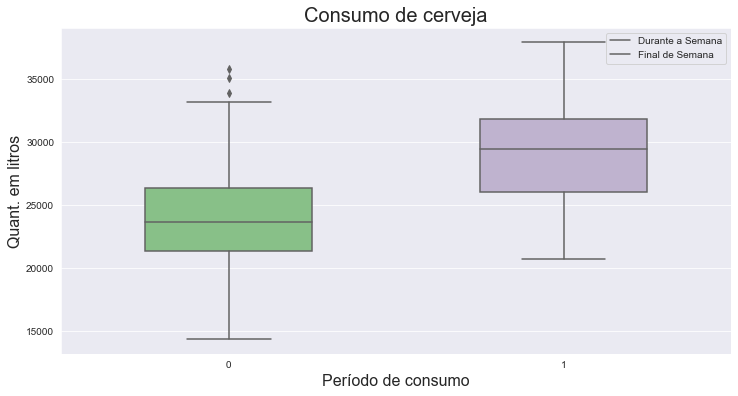

In [14]:
ax = sns.boxplot(y='consumo',x='fds',data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de cerveja', fontsize=20)
ax.set_ylabel('Quant. em litros', fontsize=16)
ax.set_xlabel('Período de consumo', fontsize=16)

pd.DataFrame({"Durante a Semana": [7,1,5,6,3,10,5,8],
                    "Final de Seman" : [1,2,8,4,3,9,5,2]})
plt.legend(labels = ['Durante a Semana','Final de Semana'])

Distribuição de frequência

C:\Users\aline\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Consumo de Cerveja (Litros)')

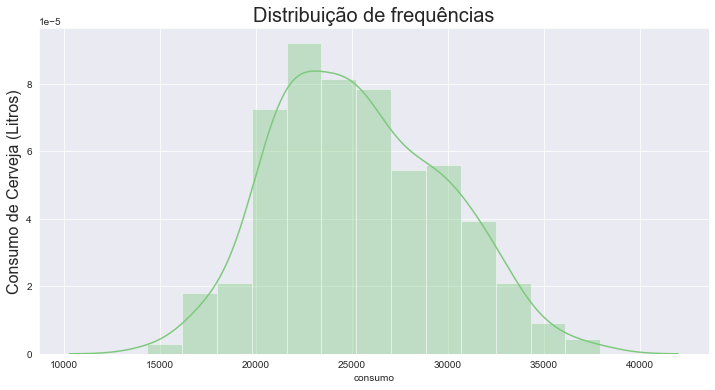

In [15]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja (Litros)', fontsize=16)

##### 3- Variável independente vs variável explicativas

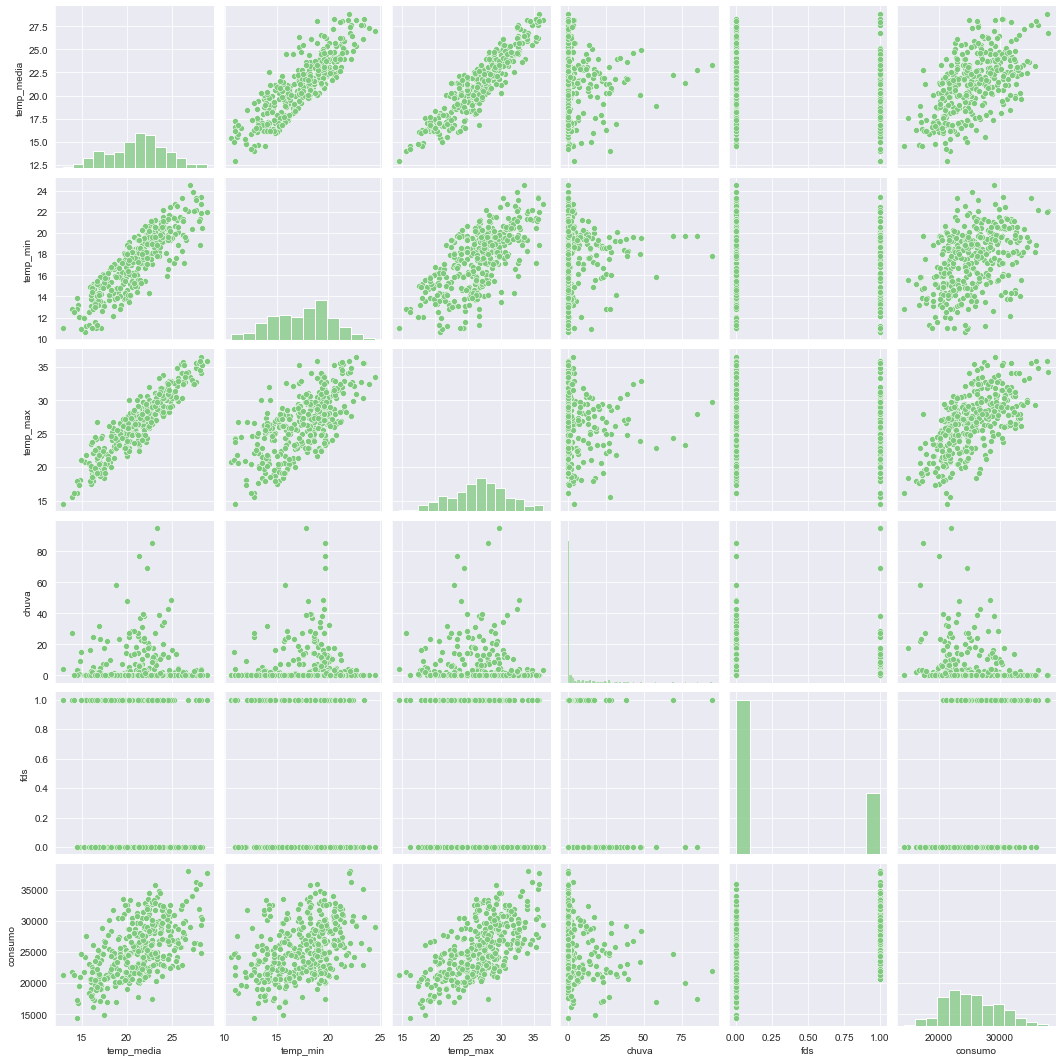

In [16]:
ax = sns.pairplot(dados)


Text(0.5, 1.06, 'Dispersão entre as Variáveis')

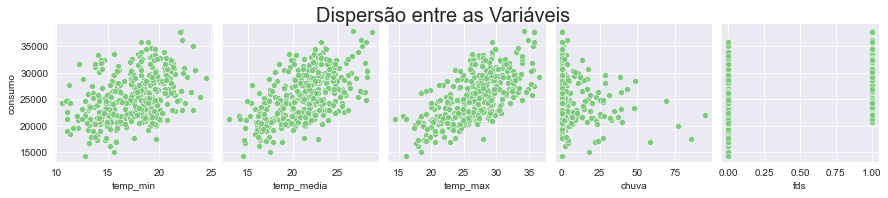

In [17]:
#Plotando o pairplot fixando somente uma variável no eixo y

ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media','temp_max','chuva','fds'])
ax.fig.suptitle('Dispersão entre as Variáveis',fontsize=20, y=1.06)

Text(0.5, 0, 'Dispersão entre as Variáveis')

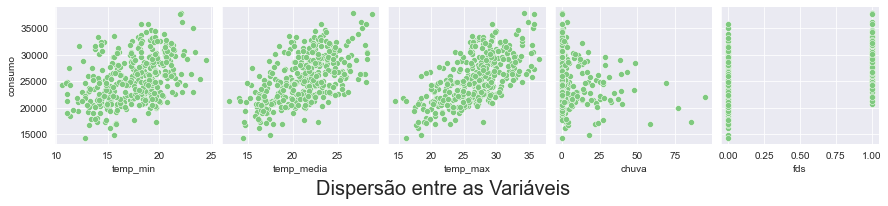

In [18]:
#Plotando o pairplot fixando somente uma variável no eixo y

ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media','temp_max','chuva','fds'])
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=0)

Text(0.5, 0, 'Dispersão entre as Variáveis')

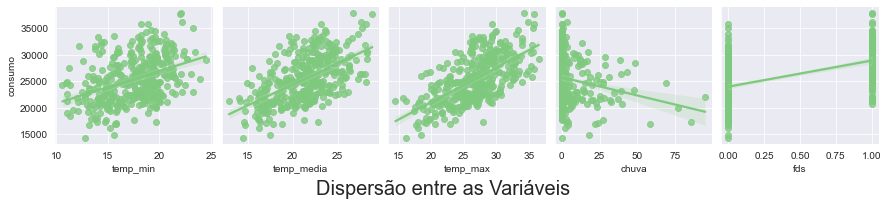

In [19]:
#Plotando o pairplot fixando somente uma variável no eixo y

ax = sns.pairplot(dados, y_vars='consumo', x_vars=['temp_min', 'temp_media','temp_max','chuva','fds'], kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=0)

Variável dependente X variável explicativas (jointplot)

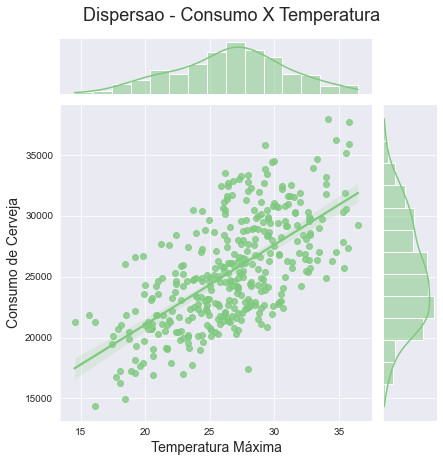

In [20]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados, kind='reg')

ax.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax

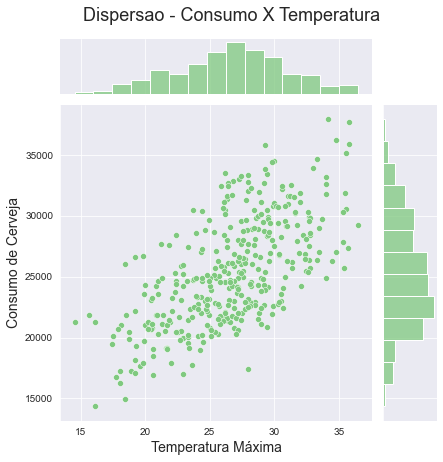

In [21]:
ax = sns.jointplot(x="temp_max", y="consumo", data=dados)

ax.fig.suptitle('Dispersao - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels("Temperatura Máxima", "Consumo de Cerveja", fontsize=14)
ax

Variável dependente X variável explicativas (Implot)

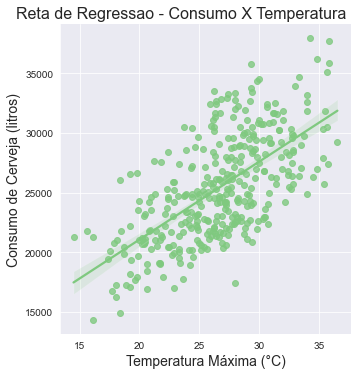

In [22]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados)

ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

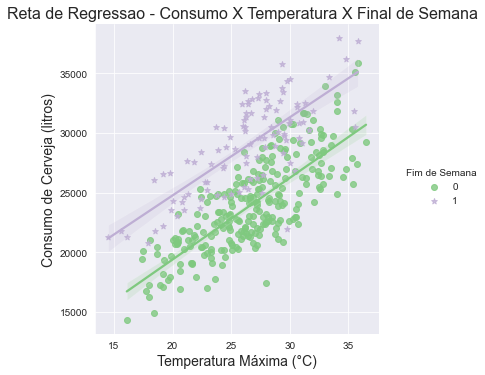

In [23]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados, hue="fds", markers=['o','*'],legend=False)

ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura X Final de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax.add_legend(title="Fim de Semana")

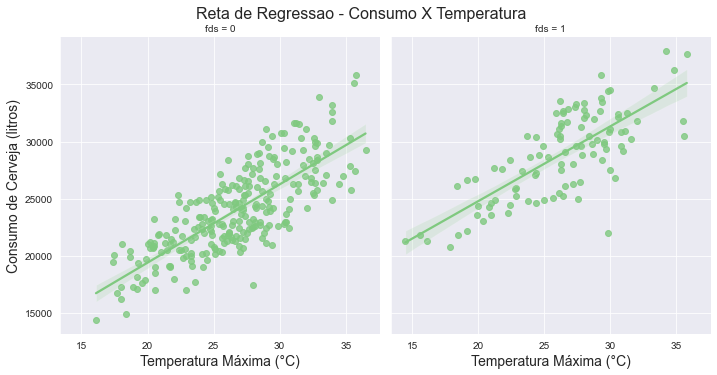

In [24]:
ax= sns.lmplot(x="temp_max", y="consumo", data=dados, col="fds")

ax.fig.suptitle('Reta de Regressao - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveja (litros)", fontsize=14)
ax

##### 4- Datasets de treino de teste

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#Criando uma series (pandas) para armazenar o consumo ceveja(Y)
y = dados['consumo']

In [27]:
#Criando um DataFrame(pandas) para armazenar as variaveis explicativas(X)
X = dados[['temp_max', 'chuva', 'fds']]

A técnica de separação aleatória de um dataset em dois conjuntos distintos treino e de teste (Ele vai selecionar aleatóriamente e alocar 30% para teste e 70% para treinor)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

##### Verificando os tamanhos dos arquivos gerados pela função train_test_split

In [29]:
X_train.shape

(255, 3)

In [30]:
X_test.shape

(110, 3)

In [31]:
X_train.shape[0] + X_test.shape[0]

365

In [32]:
X.shape[0] * 0.3

109.5

In [33]:
X.shape[0] * 0.7

255.49999999999997

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [35]:
#Instanciando a classe LinearRegression()
modelo = LinearRegression()

In [36]:
modelo.fit(X_train, y_train)

LinearRegression()

Coeficiente de Determinação - R²

In [37]:
#Para inserir 2 (ALT + 1021)
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.73


Gerando previsões para os addso de TESTE(X_test)

In [38]:
y_previsto = modelo.predict(X_test)

Obtendo o coeficiente de determinação (R²) para ´revisões do nosso modelo

In [39]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


##### Obtendo Previsões Pontuais

In [40]:
#Dados de entrada
entrada = X_test[0:1]
entrada

,temp_max,chuva,fds
5,30.5,12.2,0


In [41]:
#Gerando previsão pontual 
modelo.predict(entrada)[0] 

26094.901775262017

In [42]:
#Criando um simulador simples
temp_max = 30.5
chuva = 12.2
fds = 0

entrada = [[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

26094.90 litros


Obtendo o intercepto do modelo

In [43]:
modelo.intercept_

5951.9763393124485

In [44]:
type(modelo.intercept_)

numpy.float64

Obtendo os coeficientes de regressão

In [45]:
#tem maxima - chuva - fds
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [46]:
type(modelo.coef_)

numpy.ndarray

In [47]:
#Confirmando a ordem das variáveis explicativas no DataFrame
X.columns

Index(['temp_max', 'chuva', 'fds'], dtype='object')

In [48]:
#Criando uma lista com os nomes das variáveis do modelo
index=['Intercepto', 'Temperatura Máxima', 'Chuva (mm)', 'Final de semana']

###### Criando um DataFrame para armazenar os coeficientes do modelo

In [49]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns =['Paramêtros'])

,Paramêtros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva (mm),-60.782435
Final de semana,5401.083339


##### Análise Gráficas das previsções do modelo 

 Gerando as previsões do modelo para os dados de TREINO

In [50]:
y_previsto_train = modelo.predict(X_train)

Gráfico de dispersão entre valor estimado e valor real

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Consumo de Cerveja (litros) - Real'>

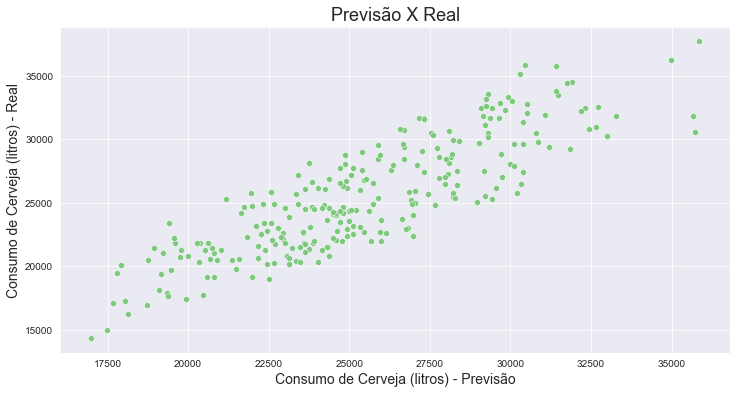

In [51]:

ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo de Cerveja (litros) - Real', fontsize=14)
ax

In [52]:
#Obtendo resíduos (termo de erro)
residuo = y_train - y_previsto_train

In [53]:
residuo

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
          ...     
73     3186.229912
68     -739.805532
215    3010.236465
341    2588.394409
84     1631.868243
Name: consumo, Length: 255, dtype: float64

##### Gráfico de dispersão entre valor estimado e resíduos

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='Consumo de Cerveja (litros) - Previsão', ylabel='Resíduos'>

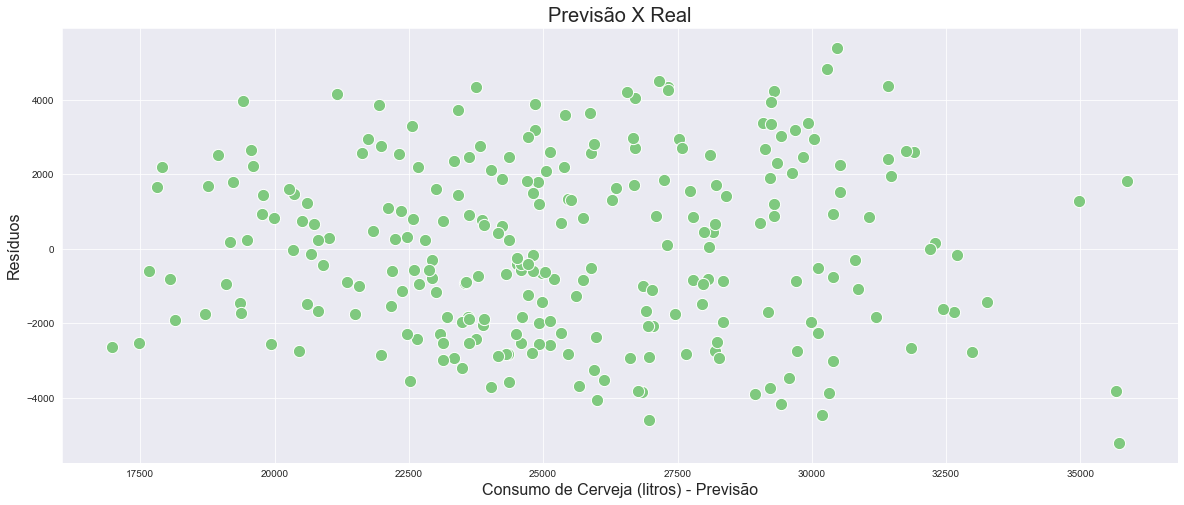

In [54]:
# Método informal de verificação da hipótese de variância constante dos resíduos(homocedasticidade)
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Previsão X Real', fontsize=20)
ax.set_xlabel('Consumo de Cerveja (litros) - Previsão', fontsize=16)
ax.set_ylabel('Resíduos', fontsize=16)
ax

C:\Users\aline\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de frequências dos resíduos'}, xlabel='Litros', ylabel='Density'>

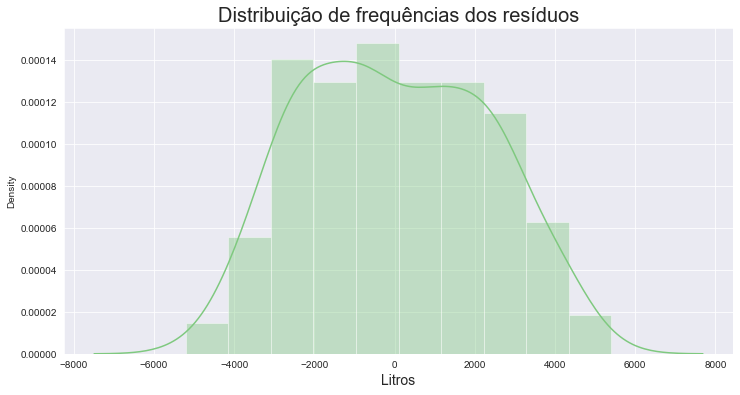

In [55]:
#Plotando a distribuição de frequências dos resíduos
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de frequências dos resíduos', fontsize=20)
ax.set_xlabel('Litros', fontsize=14)
ax

##### 05- Comparando modelos

In [56]:
#Estimando um novo modelo com a subtituição da variável explicativa Temperatura Máxima pela Temperatura Média
X2 = dados[['temp_media', 'chuva', 'fds']] 

In [57]:
#criando os datasets de treino e de teste
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size = 0.3, random_state=2811)

In [58]:
#Instanciando a classe LinearRegression()
modelo_2 = LinearRegression()

In [59]:
#Ultilizando o método fit() do objeto "modelo_2" para estimar nosso modelo linear ultilizando os dados de Treino(y2_train e X2_train)
modelo_2.fit(X2_train, y2_train)

LinearRegression()

In [60]:
#Ultilizando o método fit() do objeto "modelo_2" para estimar nosso modelo linear ultilizando os dados de Treino(y2_train e X2_train)
modelo_2.fit(X2_train, y2_train)

LinearRegression()

In [61]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com Temp. Máxima
R² = 0.73


In [62]:
y_previsto = modelo.predict(X_test)
y_previsto_2 = modelo_2.predict(X2_test)

Obtendo o coeficiente de determinação (R²) para as previsões do dois modelos

In [63]:
print('Modelo com Temp. Média')
print('R² = {}'.format(metrics.r2_score(y2_test, y_previsto_2).round(2)))

Modelo com Temp. Média
R² = 0.66


In [64]:
print('Modelo com Temp. Máxima')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

Modelo com Temp. Máxima
R² = 0.69


Outras métricas de Regressão

In [65]:
#Obtendo métricas para o modelo comTemperatura Média

EQM_2 = metrics.mean_squared_error(y2_test, y_previsto_2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test, y_previsto_2)).round(2)
R2_2 = metrics.r2_score(y2_test, y_previsto_2).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


In [66]:
#Obtendo métricas para o modelo comTemperatura Máxima

EQM_2 = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2_2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69


##### 06- Salvado e caregando o modelo

In [67]:
X_test[0:1]

,temp_max,chuva,fds
5,30.5,12.2,0


In [71]:
entrada = X_test[0:1]

Gerando prevsão pontual

In [70]:
modelo.predict(entrada)[0]

26094.901775262017

Criando um simulado simples


In [72]:
temp_max = 30.5
chuva=12.2
fds=0
entrada=[[temp_max, chuva, fds]]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

26094.90 litros


In [74]:
import pickle 

In [76]:
output = open('modelo_consumo_cerveja','wb')
pickle.dump(modelo, output)
output.close()